# What is Anomlay Detection Algorithm ?
* Anomaly detection is the process of identifying unexpected items or events in datasets, which differ from the normal.
* The abnormal items called <strong>anomalous points</strong>

# About the dataset 

* The dataset is about server computers and it contains unexpected behavior in server computers  
* As a result of that,  we will implement an anomaly detection algorithm to detect the anomalous behavior in server computers 

# Attribute details of the dataset 
<table style = "width:100%">
    <tr>
      <th style="text-align:center" >Name</th>
      <th style="text-align:center">Type</th> 
      <th style="text-align:center">Description</th>
      <th style="text-align:center">Units</th>
    </tr>
    <tr>
        <td style="text-align:center">Latency(ms)</td>
        <td style="text-align:center">Float</td>
        <td style="text-align:center">Latency is the delay between a user's action and a web application's response to that action</td>
        <td style="text-align:center">Latency is usually measured in milliseconds or ms.</td>
    </tr>
    <tr>
        <td style="text-align:center">Throughput(mb/s)</td>
        <td style="text-align:center">Float</td>
        <td style="text-align:center">Throughput is the amount of data can be sent and recieved within a unit of time</td>
        <td style="text-align:center">Throughput is usually measured in megabit per second or mb/s and it is equivalent to 1,000,000 bits per second.</td>
    </tr>
</table>

<br>



# A picture is worth a thousand words

<br>


### Description of the Latency and Throughput attributes
<img src = "https://i.imgur.com/xRaQjMJ.jpg">

<br>



### How we claculate Latency
<img src = "https://i.imgur.com/en5js9J.jpg">


<br>

In [5]:
#import the most imporatant libraries
import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt 

In [34]:
#label every column
names = ["Latency(ms)","Throughput(mb/s)"]


#import the training datset
df = pd.read_csv("tr_server_data.csv",header = None , names = names)

#import the crossvalidation dataset
df_cv = pd.read_csv("cv_server_data.csv", header = None, names = names)

#import the labels of the cross validation dataset
labels_cv = pd.read_csv("gt_server_data.csv", header = None)

In [7]:
#Explore the dataset
df

,Latency(ms),Throughput(mb/s)
0,13.0470,14.741
1,13.4090,13.763
2,14.1960,15.853
3,14.9150,16.174
4,13.5770,14.043
...,...,...
302,12.4770,14.459
303,19.5830,10.412
304,23.3400,16.299
305,18.2610,17.978


In [24]:
#Explore the cross-validation dataset
df_cv

,Latency(ms),Throughput(mb/s)
0,15.79000,14.9210
1,13.64000,15.3300
2,14.86600,16.4740
3,13.58500,13.9890
4,13.46400,15.6350
...,...,...
302,0.30794,5.3914
303,28.54200,21.6000
304,19.03500,12.0290
305,14.37600,23.3560


In [28]:
#Explore the shape of the dataset (Training, cross-validation)
print(f"The shape of the training set {df.shape}\nThe shape of the cross-validation set{df_cv.shape}")

The shape of the training set (307, 2)
The shape of the cross-validation set(307, 2)


In [38]:
#Explore the shape of the labels of the cross validation set
print(f"The shape of the labels of the CV set{labels_cv.shape}")

The shape of the labels of the CV set(307, 1)


In [9]:
#Explore the top five rows of the dataset 
df.head()

,Latency(ms),Throughput(mb/s)
0,13.047,14.741
1,13.409,13.763
2,14.196,15.853
3,14.915,16.174
4,13.577,14.043


In [10]:
#Explore the last five rows of the dataset
df.tail()

,Latency(ms),Throughput(mb/s)
302,12.4770,14.459
303,19.5830,10.412
304,23.3400,16.299
305,18.2610,17.978
306,4.7526,24.350


In [11]:
#Explore the data types in the data set
df.dtypes

Latency(ms)         float64
Throughput(mb/s)    float64
dtype: object

In [12]:
#Explore the missing values
df.isnull().sum()

Latency(ms)         0
Throughput(mb/s)    0
dtype: int64

Text(0.5, 1.0, 'The Relationship between Latency and Throughput')

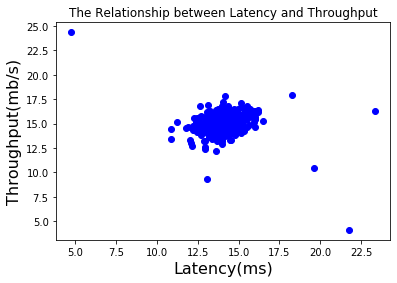

In [13]:
#Throughput and latency have a direct relationship, so lets plot the relationship between them
plt.scatter(df["Latency(ms)"].values,df["Throughput(mb/s)"].values, color = "b" )
plt.xlabel("Latency(ms)" , fontsize = 16)
plt.ylabel("Throughput(mb/s)", fontsize = 16)
plt.title("The Relationship between Latency and Throughput")

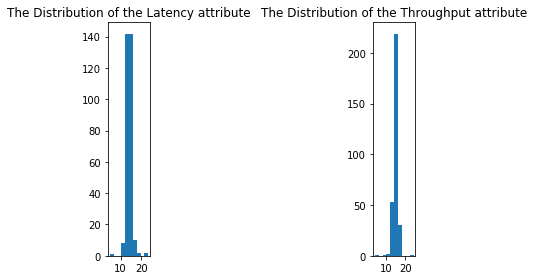

In [14]:
#Explore the distribution of the attributes 
fig , axs = plt.subplots(1,2)
axs[0].hist(df["Latency(ms)"].values)
axs[0].set_title("The Distribution of the Latency attribute")
axs[1].hist(df["Throughput(mb/s)"].values)
axs[1].set_title("The Distribution of the Throughput attribute")
plt.tight_layout(w_pad=12)

### Note:
We can see that the distibution of every attribute is nomral distribution and that what in order to implement the anomly detection algorithm.

In [35]:
#Convert the training set to numpy-array in order to feed it the algorithm properly
X = df.values

#Explore the new format of the dataset  
X 

array([[13.047 , 14.741 ],
       [13.409 , 13.763 ],
       [14.196 , 15.853 ],
       [14.915 , 16.174 ],
       [13.577 , 14.043 ],
       [13.922 , 13.406 ],
       [12.822 , 14.223 ],
       [15.676 , 15.892 ],
       [16.163 , 16.203 ],
       [12.666 , 14.899 ],
       [13.985 , 12.958 ],
       [14.061 , 14.549 ],
       [13.39  , 15.562 ],
       [13.394 , 15.627 ],
       [13.979 , 13.281 ],
       [14.168 , 14.466 ],
       [13.962 , 14.752 ],
       [14.459 , 15.07  ],
       [14.585 , 15.827 ],
       [12.074 , 13.067 ],
       [13.549 , 15.538 ],
       [13.986 , 14.788 ],
       [14.97  , 16.518 ],
       [14.256 , 15.294 ],
       [15.334 , 16.125 ],
       [15.635 , 16.491 ],
       [13.621 , 15.459 ],
       [14.815 , 15.34  ],
       [14.593 , 14.612 ],
       [14.489 , 15.641 ],
       [15.527 , 14.636 ],
       [13.975 , 14.765 ],
       [12.954 , 14.823 ],
       [12.888 , 15.076 ],
       [16.022 , 16.257 ],
       [14.926 , 16.297 ],
       [12.466 , 14.183 ],
 

In [31]:
#Convert the cv set to numpy-array in order to compute F1 score 
#Which we use it to choose the threshold 𝜖
X_val = df.values

#Explore the new format of the dataset  
X_val

array([[13.047 , 14.741 ],
       [13.409 , 13.763 ],
       [14.196 , 15.853 ],
       [14.915 , 16.174 ],
       [13.577 , 14.043 ],
       [13.922 , 13.406 ],
       [12.822 , 14.223 ],
       [15.676 , 15.892 ],
       [16.163 , 16.203 ],
       [12.666 , 14.899 ],
       [13.985 , 12.958 ],
       [14.061 , 14.549 ],
       [13.39  , 15.562 ],
       [13.394 , 15.627 ],
       [13.979 , 13.281 ],
       [14.168 , 14.466 ],
       [13.962 , 14.752 ],
       [14.459 , 15.07  ],
       [14.585 , 15.827 ],
       [12.074 , 13.067 ],
       [13.549 , 15.538 ],
       [13.986 , 14.788 ],
       [14.97  , 16.518 ],
       [14.256 , 15.294 ],
       [15.334 , 16.125 ],
       [15.635 , 16.491 ],
       [13.621 , 15.459 ],
       [14.815 , 15.34  ],
       [14.593 , 14.612 ],
       [14.489 , 15.641 ],
       [15.527 , 14.636 ],
       [13.975 , 14.765 ],
       [12.954 , 14.823 ],
       [12.888 , 15.076 ],
       [16.022 , 16.257 ],
       [14.926 , 16.297 ],
       [12.466 , 14.183 ],
 

In [37]:
#Convert the labels of cv-set in order compute the F1 score 
yval = labels_cv.values

#Exlpore the labels in the new format 
yval

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    



<br>

# Define Some Helper Functions 

* [estimateGaussian()](#1)
 * For estimating the parameters $(\large \mu_{i}, \sigma^{2}_{i})$
* [ComputeNormalDist()](#2)
 * For computing The Gaussian Distribution of $ \large X $
* [computeProbs()](#3)
 * For computing probabilities for all the examples in a dataset
* [selectThreshold()](#4) 
 * For selecting the threshold, $\large \epsilon$
* [AnomalyDetection()](#5)
 * For building anomaly detection algorithm

## estimateGaussian() <a anchor = "anchor" id = "1"></a>

We can estimate the parameter $\mu_{i}$ using the formula:
\begin{equation}
\large
\mu_{i} = \frac {1}{m}  \sum_{j = 1} ^{m} {x_{i}^{(j)}}
\end{equation}

Also , we can estimate the parameter $\sigma^{2}_{i}$ using the formula:
\begin{equation}
\large
\sigma_{i}^{2} = \frac {1}{m}  \sum_{j = 1} ^{m} {(x_{i}^{(j)} - \mu_{i})^{2}}
\end{equation}

In [17]:
def estimateGaussian(X):
    '''
    Usage:
      #estimateGaussian--> used for  estimating the parameters, (µi, σi2), of the i-th feature 
  
    Arguments:
      #X --> The Design Matrix
    
    Returns:
      #mu --> n-dimension-vector that holds the mean of all n-features
      #sigma2 --> n-dimension-vector that holds the variance of all vectors
      
    '''
    
    #Define the (#training examples , #features) = (m,n) respectively 
    m,n  = X.shape
    
    #Pre-allocating mu and sigma2 
    mu = np.zeros((n,))
    sigma2 = np.zeros((n,))
    
    
    #compute the estimated parameter µ
    mu = (1/m) * np.sum(X, axis = 0)
    
    #Compute the estimated parameter σ
    sigma2 = (1/m) * np.sum(np.power(X - mu, 2), axis = 0)
    
    return mu,sigma2

<br> 

## ComputeNormalDist() <a anchor = "anchor" id = "2"></a>

<strong>In probability theory,</strong> a normal (or Gaussian or Gauss or Laplace–Gauss) distribution is a type of continuous probability distribution for a real-valued random variable. 

The general form of its probability density function is:
<img  src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/00cb9b2c9b866378626bcfa45c86a6de2f2b2e40">


### Note:
* <strong>In probability theory and statistics,</strong> a probability distribution is the mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment.

* if <strong>$x$</strong> (a single training example) in <strong>$X$</strong>(the dataset) is not a scalar but it is a n-dimension vector so the the gauassian distribution of $x \in X$ is defined as:

\begin{equation}
P(x) = P(x_{1},x_{2},\ldots,x_{n}) = P(x_{1};\mu_{1},\sigma_{1}^{2}) \hspace{1mm} P(x_{2};\mu_{2},\sigma_{2}^{2}) \hspace{1mm} \ldots P(x_{n};\mu_{n},\sigma_{n}^{2})
\end{equation}   

In [18]:
def computeNormalDist(X,mu,sigma2):
    '''
    Usage:
      #computeNormalDist--> used for  computing the The Gaussian Distribution of X ,P 
  
    Arguments:
      #X --> n- vector represenets a single example
      #mu --> n-dimension-vector that holds the mean of all n-features
      #sigma2 --> n-dimension-vector that holds the variance of all vectors
    
    Returns:
      #P --> The Gaussian Distribution of X which controlled by µ, σ

    '''
    #we will decompose the term P into two components frac_term , exp_term
    frac_term = (1/ (np.sqrt(2*np.pi *sigma2)))
    exp_term = np.exp(-(np.power((X - mu),2) / (2 * sigma2)))
    
    #Computing P which is the prodcut of the probabilities of each feature in X 
    P = np.product(np.multiply(frac_term,exp_term), axis = 0)
    
    return P 

<br>

# computeProbs() <a anchor = "anchor" id = "3" /> 

In [39]:
def computeProbs(X,mu,sigma2):
    '''
    Usage:
      #computProbs--> used for computing all the probabilities for all examples in a dataset 
  
    Arguments:
      #X --> represents the design matrix of a dataset
      #mu --> n-dimension-vector that holds the mean of all n-features
      #sigma2 --> n-dimension-vector that holds the variance of all vectors
    
    Returns:
      #Probs --> m-by-one vector holds the probability of every example in a dataset
                 where m is the number of eamples of the datset
                 
    Notes:
      #The symbol, X, here represents the design matrix, in contrast,
       the symbol, X, in computeNormDist() function represents just single example

    '''
    
    #Define the number of training eamples, m
    m = X.shape[0]
    
    #Pre-allocating probs which has size of (m,1)
    probs = np.zeros((m,1))
    
    #loop over all examples in the dataset
    for i in range(m):
        probs[i] = computeNormalDist(X[i],mu,sigma2)
        
        
    return probs

<br>

# selectThreshold() <a anchor = "anchor" id = "4" />

* After estimating the Gaussian parameters, ($ \mu , \sigma$), we can know which example has high probability and which has low probability.


* The low probability examples are more likely to be the anomalies, in contrast, the high probability examples are more likely to be  normal. 



* <strong> But, How do we say that the probability of an example is low or high ?</strong>
    * one way to determine that is to choose cutoff value (threshold) to determine which example has 
    a low probability or high probability.
    * Then, we can determine which example is anomalies or not based on its probability.
    
    
* We choose the threshold by computing F1 score using the cross-validation set. 



### Recall some defintions:

* <strong>True Positive (TP):</strong> The model classifies the example as positive, and the actual label also
  positive.
  
  
* <strong>False Positive (FP):</strong> The model classifies the example as positive, but the actual label is
  negative.
  
  
* <strong>True Negative (TN):</strong> The model classifies the example as negative, and the actual label is also
  negative.
  
  
* <strong>False Negative (FN):</strong> The model classifies the example as negative, but the label is actually
  positive.
  
  
* <strong>Recall (rec):</strong> The precentage of the true-positive values, TP, of actual positive-values.

 * Recall tells us the ability of  the model to recall (remeber) the actual positive-values $( y = 1)$.
 
 <br>
 
\begin{equation}
\large
rec = \frac{TP}{the\hspace{1mm}number\hspace{1mm}of\hspace{1mm}actual\hspace{1mm}positive\hspace{1mm}values}
= \frac{TP}{TP + FN}
\end{equation} 

<br>

* <strong>Precision (pre):</strong> The precentage of the true-positive values, TP,  of predictive-positive values.
 * Precision tells us the ability of  the model to be very exact or correct (precise) in prediction.
 
  
 <br>
 
\begin{equation}
\large
pre = \frac{TP}{the\hspace{1mm}number\hspace{1mm}of\hspace{1mm}predictive\hspace{1mm}positive\hspace{1mm}values}
= \frac{TP}{TP + FP}
\end{equation} 

<br>

### How to compute F1 Score ?

<p style = "font-size: 18">F1 score is defined as:</p>

\begin{equation}
\large
F_{1} = \frac{2 \cdot pre \cdot rec}{ pre + rec}
\end{equation}


<br>

In [54]:
def selectThreshold(yval, pval):
    
    '''
    Usage:
      #selectThreshold--> finds the best threshold, 𝜖, to use for selecting the anomalies examples
  
    Arguments:
      #yval --> The Ground-truth for cross-validation set where the label y = 1 
                corresponds to an anomalous example, and y = 0 corresponds to a normal example.
                
      #pval --> the probabilities of all the examples in the cross validation dataset
    
    Returns:
      #bestEpsilon --> The selected threshold, 𝜖
      #bestF1 --> a score tells us how well we are doing on finding the ground truth anomalies 
                  given a cetrain threshold
    '''
    
    #intialize some useful variables 
    bestEpsilon = 0 #represents the best cut-off value to use
    bestF1 = 0      #represents the best F1 score we compute corresponding to best episoln
    F1 = 0          #represents the computed value of F1 Score crossponding to a cetrain espilon
    
    #Define the step size to get different values for the threshold, 𝜖
    stepSize = (max(pval) - min(pval)) / 1000
    
    #Loop for every different value for epsilon starting from minmun value of pval
    #up till the maximum value of pval
    for epsilon in np.arange(min(pval), max(pval) + stepSize, stepSize):
        
        #Make prediction based on the current value of espilon
        preds = (pval < epsilon)
        
        #Compute the predictive positives
        pred_positives = (preds == 1)
        
        #Compute the predictive negatives
        pred_negatives = (preds == 0)
        
        #Compute the actual positives
        true_postivies = (yval == 1)
        
        #Compute the actual negtaives
        true_negatives = (yval == 0)
        
        #Compute --> {TP,TN,FP,FN}
        TP = np.sum(pred_positives & true_postivies)
        TN = np.sum(pred_negatives & true_negatives)
        FP = np.sum(pred_positives & true_negatives)
        FN = np.sum(pred_negatives & true_postivies)
        
        #Compute the precision 
        pre = TP / (TP + FP)
        
        #Compute the recall
        rec = TP/(TP + FN)
        
        #Compute F1 score
        F1 = (2 * pre * rec) / (pre + rec)
        
        #if the current value of F1 > bestF1 (the best-value we have)
        #update bestF1 to be F1
        #update bestEpsilon corresponding to bestF1
        if (F1 > bestF1):
            bestF1 = F1
            bestEpsilon = epsilon
            
            
    return bestEpsilon, bestF1

# AnomalyDetection <a anchor = anchor id = "5"></a>


## The Pseudo-code of The Algorithm

<strong>Given:</strong> $\large X = \{ x^{1},\ldots,x^{m} \}$

 Fit parameters $\large \mu_{1},\ldots,\mu_{n},\sigma_{1}^{2},\ldots,\sigma_{n}^{2}$
 
 Choose $\large \epsilon$
 
 Given new example $\large x$, compute $\large p(x)$
 
 Anomaly if $\large p(x) < \epsilon$ 
 




In [109]:
def AnomalyDetection(X,mu,sigma2,epsilon):
    '''
    Usage:
      #AnomalyDetection--> used for buliding anomaly detection algorithm
  
    Arguments:
      #X --> n- vector represenets a single example
      #mu --> n-dimension-vector that holds the mean of all n-features
      #sigma2 --> n-dimension-vector that holds the variance of all vectors
      #epsilon --> cut-off value(threshold) which we predict the example is 
                   anomalous or normal based on it
                   
    Returns:
      #P --> The Gaussian Distribution of X  
      #check --> a boolean value represents the check we do on (𝑝(𝑥) < 𝜖) in order know that examlpe 
                 is anomalous or not.
                 if check is true --> the example is anomalous
                 if not, the example is normal

    '''
    
    
    #Compute p(x) based on 𝜇,𝜎
    P = computeNormalDist(X,mu,sigma2)
    
    #check 
    if (P < epsilon):
        check = True
        
        print("The Example is anomalous")
        
    else:
        check = False
        
        print("The Example is normal")

        
    return P,check

# Building The Model

<br>



## 1. Fit parameters $\mu_{1},\ldots,\mu_{n},\sigma_{1}^{2},\ldots,\sigma_{n}^{2}$

In [43]:
mu, sigma2 = estimateGaussian(X)

In [46]:
#Explore mu
mu

array([14.11225277, 14.99767459])

In [48]:
#Explore sigma2
sigma2

array([1.8326777 , 1.70971534])

## 2.Choose $\epsilon$

In [49]:
#Compute all the probabilities for all training examples
pval = computeProbs(X,mu,sigma2)

In [51]:
#Explore pval
pval

array([[6.47133258e-02],
       [5.03040097e-02],
       [7.24548692e-02],
       [5.03171714e-02],
       [6.36962676e-02],
       [4.24386180e-02],
       [4.79010221e-02],
       [3.65171430e-02],
       [1.86635896e-02],
       [5.06695418e-02],
       [2.65160793e-02],
       [8.47102822e-02],
       [7.10492642e-02],
       [6.95645708e-02],
       [3.77939963e-02],
       [8.27074535e-02],
       [8.77959656e-02],
       [8.68769898e-02],
       [6.91800944e-02],
       [9.73071015e-03],
       [7.57085319e-02],
       [8.83777286e-02],
       [3.74176620e-02],
       [8.71393803e-02],
       [4.12615119e-02],
       [2.48796251e-02],
       [7.91026458e-02],
       [7.59305679e-02],
       [8.08237699e-02],
       [7.66360280e-02],
       [5.01244877e-02],
       [8.80455102e-02],
       [6.17994704e-02],
       [5.96278726e-02],
       [2.09053692e-02],
       [4.58073149e-02],
       [3.53512898e-02],
       [8.21316277e-02],
       [7.24289126e-02],
       [8.49723935e-02],


In [56]:
#Choose 𝜖
bestEpsilon, bestF1 = selectThreshold(yval, pval)

C:\Users\FADY-PC\anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in long_scalars


In [60]:
#Explore bestEpsilon
bestEpsilon

8.9860231414969e-05

In [61]:
#Explore BestF1
bestF1

0.8

## 3.Given new example $x$, compute $p(x)$ 

### Make Prediction on Anomalous Example

In [110]:
#lets make predictions on one of the examples in cross-validation set
X_val[305]

array([18.261, 17.978])

In [111]:
#print the groundtruth of the exaple
yval[305]

array([1], dtype=int64)

In [112]:
#Apply the model on this example
P, check = AnomalyDetection(X_val[305] , mu ,sigma2,epsilon = bestEpsilon)

The Example is anomalous


In [113]:
#Explore p(x)
P

6.113495866735034e-05

In [114]:
#Explore if it's anomalous --> True, or not --> False 
check

True

### Make Prediction on Normal Example

In [115]:
#lets make predictions on one of the examples in cross-validation set
X_val[1]

array([13.409, 13.763])

In [116]:
#print the groundtruth of the exaple
yval[1]

array([0], dtype=int64)

In [117]:
#Apply the model on this example
P, check = AnomalyDetection(X_val[1] , mu ,sigma2,epsilon = bestEpsilon)

The Example is normal


In [118]:
#Explore p(x)
P

0.05030400965540127

In [119]:
#Explore if it's anomalous --> True, or not --> False 
check

False

## Make Prediction on Unlabelled Examples

Text(0.5, 1.0, 'The Relationship between Latency and Throughput')

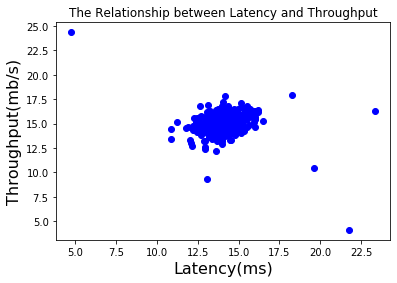

In [120]:
#Recall this figure
#Throughput and latency have a direct relationship, so lets plot the relationship between them
plt.scatter(df["Latency(ms)"].values,df["Throughput(mb/s)"].values, color = "b" )
plt.xlabel("Latency(ms)" , fontsize = 16)
plt.ylabel("Throughput(mb/s)", fontsize = 16)
plt.title("The Relationship between Latency and Throughput")

### Notes From The Figure:

* We can see that when the latency is less than five, the examples seem to be anomalous.
* We can see that when the latency is in range 12.5 to 15, the examples seem to be normal 

In [121]:
#Get an example has latency less than 5 
X[306]

array([ 4.7526, 24.35  ])

In [ ]:
#Apply the model on this example
P, check = AnomalyDetection(X[306] , mu ,sigma2,epsilon = bestEpsilon)

In [123]:
#Get an example has latecny in range 12.5 to 15
X[2]

array([14.196, 15.853])

In [124]:
#Apply the model on this example
P, check = AnomalyDetection(X[2] , mu ,sigma2,epsilon = bestEpsilon)

The Example is normal


# Congratulations!